In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,make_scorer
from sklearn.model_selection import GridSearchCV
import pickle


In [2]:
df=pd.read_csv("adult.data")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(32560, 15)

In [6]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

In [7]:
df=pd.DataFrame(data=df.values,columns=column_names)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
df.shape

(32560, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  object
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  object
 3   education       32560 non-null  object
 4   education-num   32560 non-null  object
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  object
 11  capital-loss    32560 non-null  object
 12  hours-per-week  32560 non-null  object
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [16]:
num_cols = [
    'age',
    'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

for col in num_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [19]:
df.nunique()

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(24)

In [21]:
#identifying garbage values
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***"*10)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
******************************
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
******************************
marital-status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
**********************

In [46]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [22]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


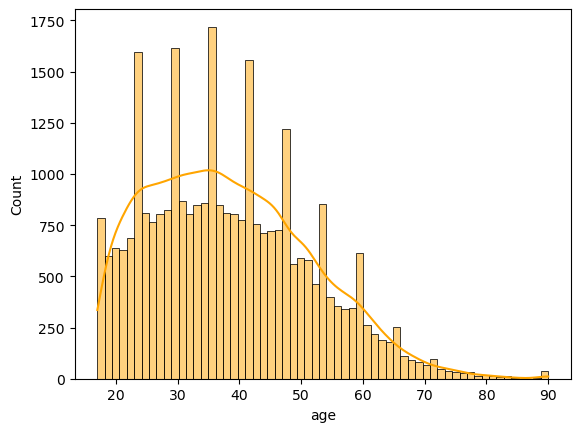

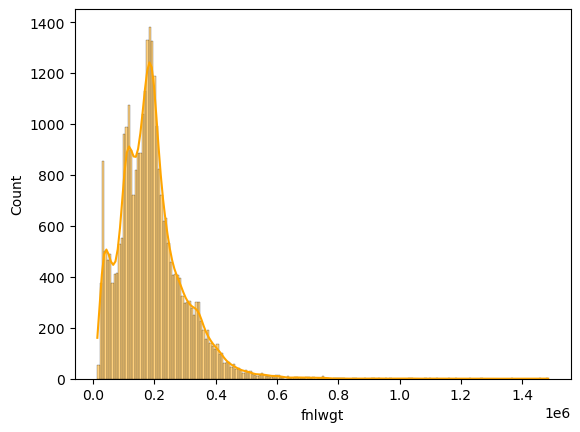

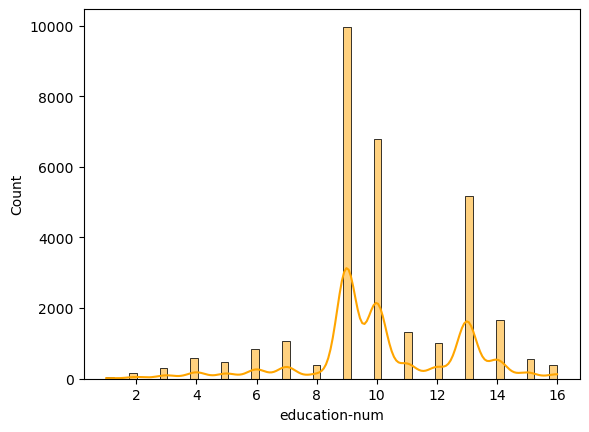

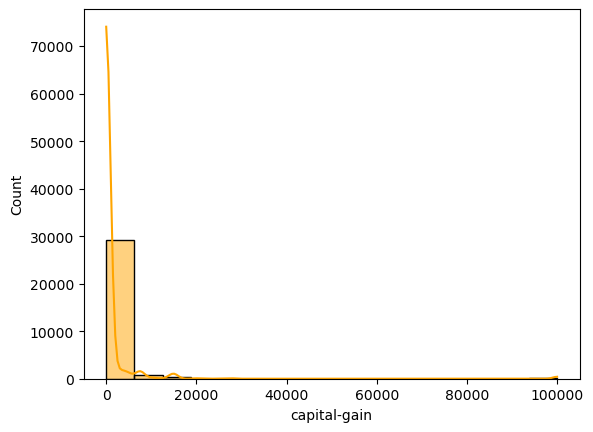

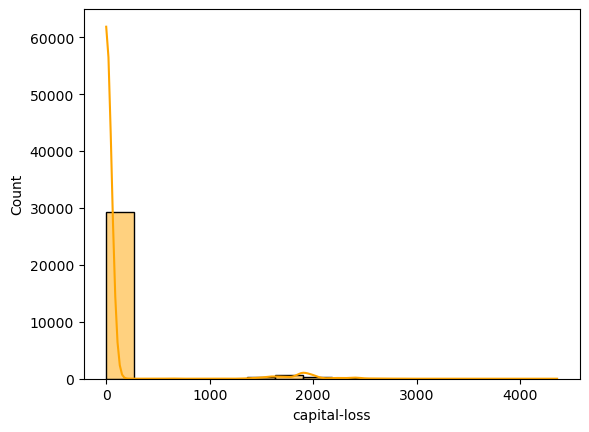

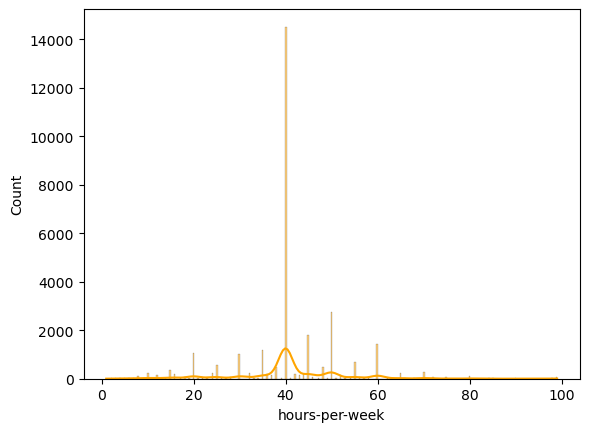

In [58]:
#histogram to understand distribution
for i in df.select_dtypes(include='number').columns:
    sns.histplot(df[i],kde=True,color='Orange')
    plt.show()

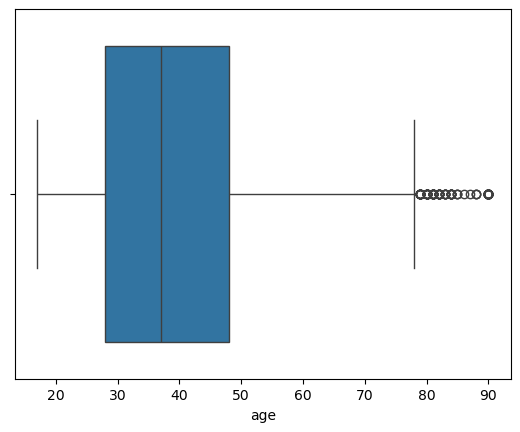

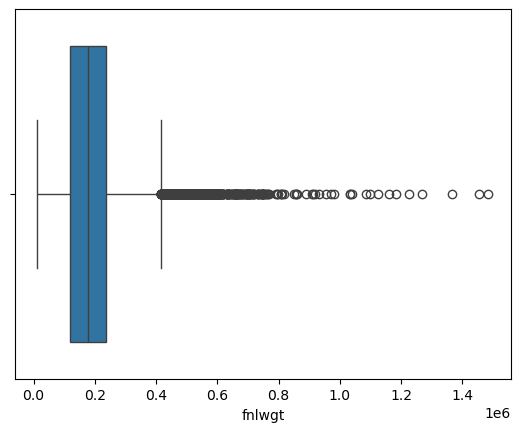

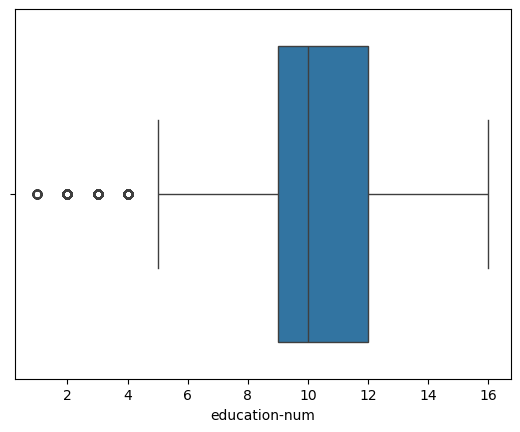

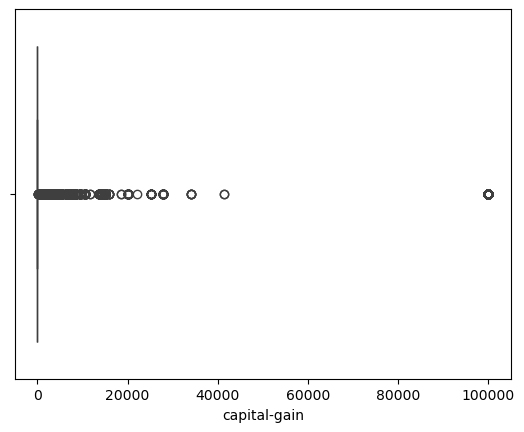

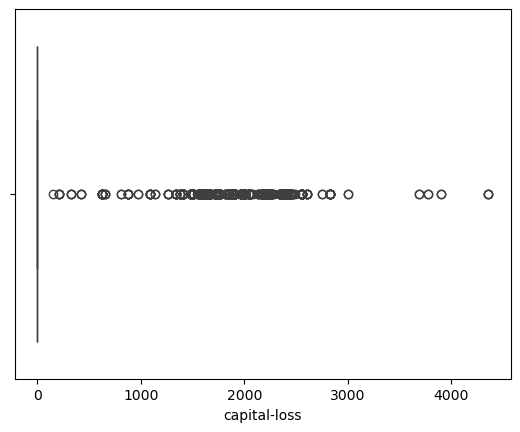

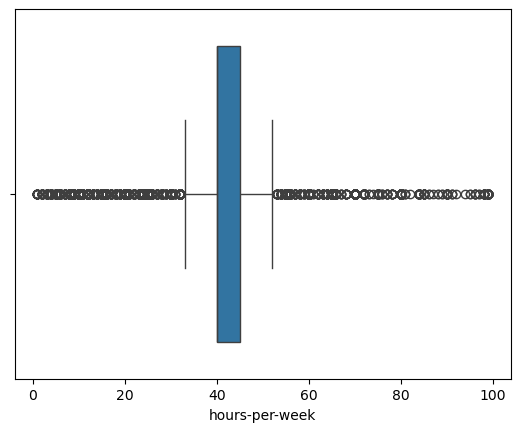

In [24]:
#Boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [27]:
#corelation heatmap to interpret the realation and multicollinearity
s=df.select_dtypes(include='number').corr()

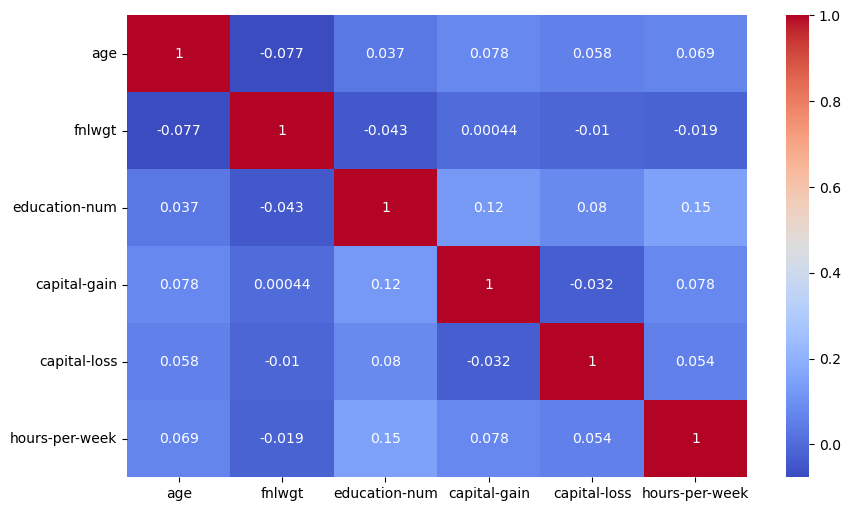

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(s,annot=True,cmap='coolwarm')
plt.show()

In [30]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<Axes: xlabel='Income'>

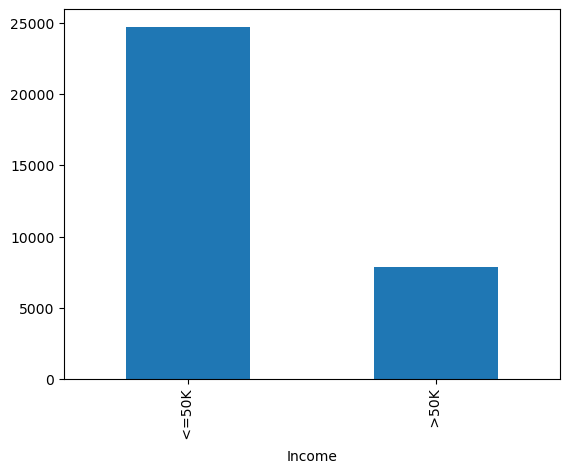

In [32]:
df['Income'].value_counts().plot(kind='bar')

<Axes: xlabel='workclass'>

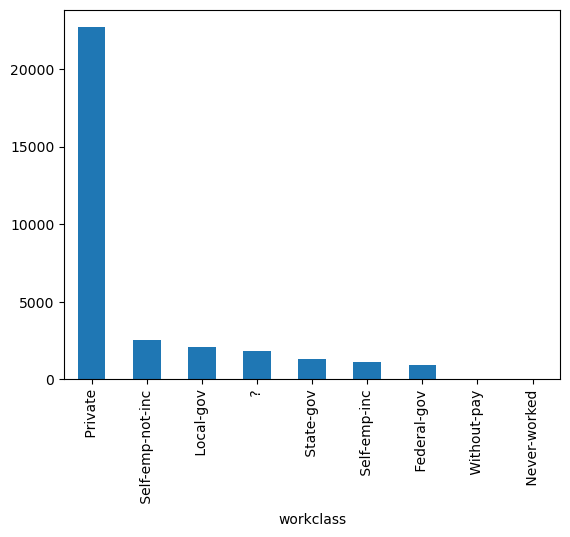

In [31]:
df['workclass'].value_counts().plot(kind='bar')

In [33]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<Axes: xlabel='education'>

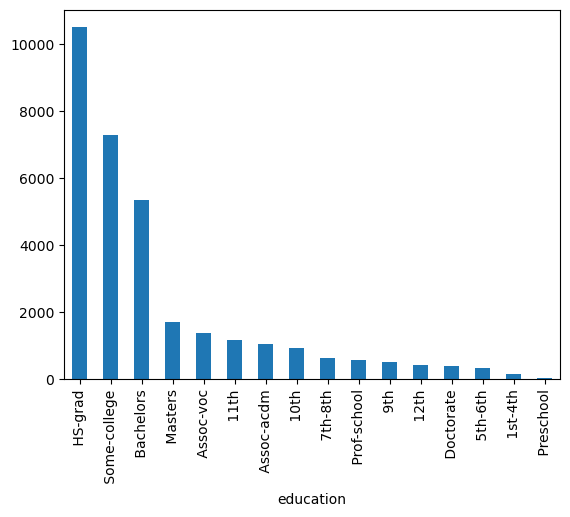

In [34]:
df['education'].value_counts().plot(kind='bar') 

<Axes: xlabel='marital-status'>

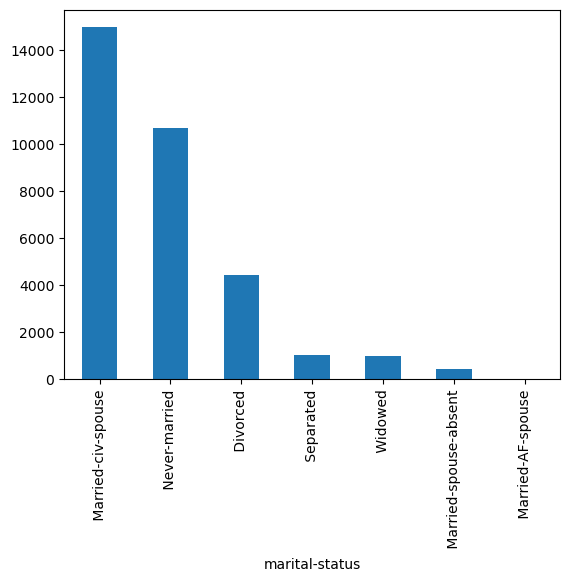

In [35]:
df['marital-status'].value_counts().plot(kind='bar')

<Axes: xlabel='occupation'>

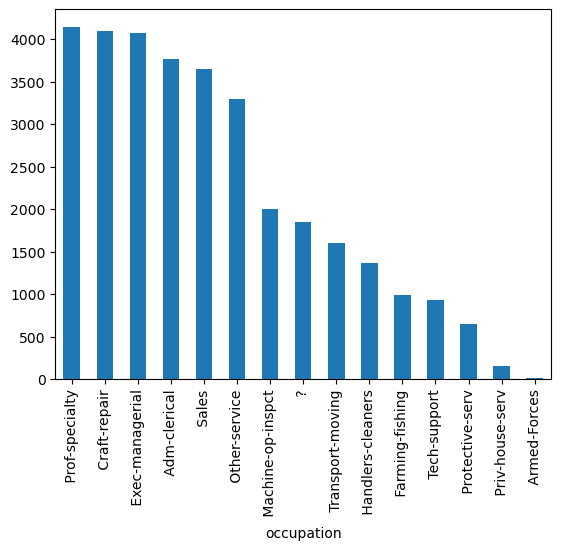

In [36]:
df['occupation'].value_counts().plot(kind='bar')

<Axes: xlabel='relationship'>

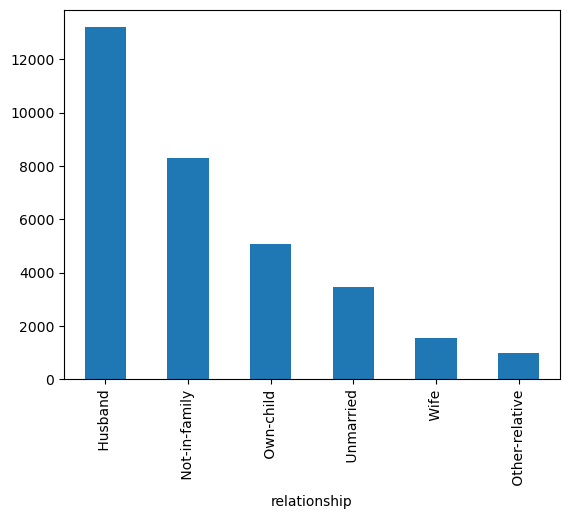

In [37]:
df['relationship'].value_counts().plot(kind='bar')

<Axes: xlabel='race'>

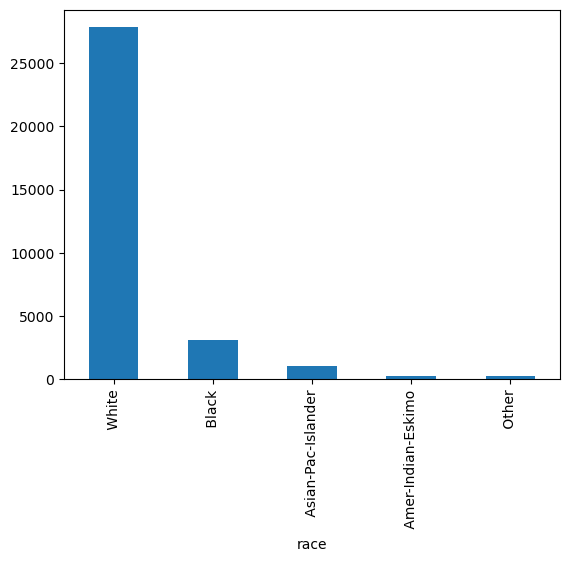

In [38]:
df['race'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

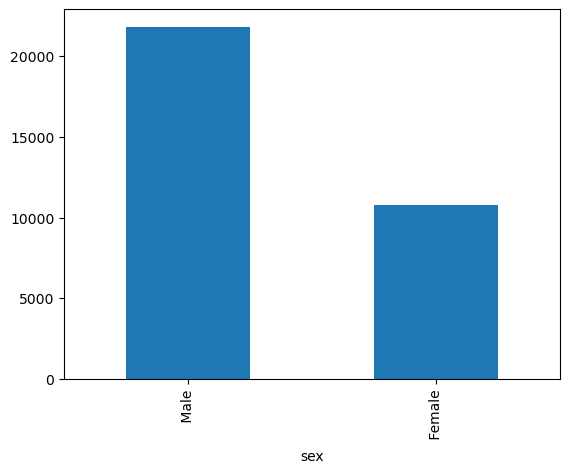

In [39]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='native-country'>

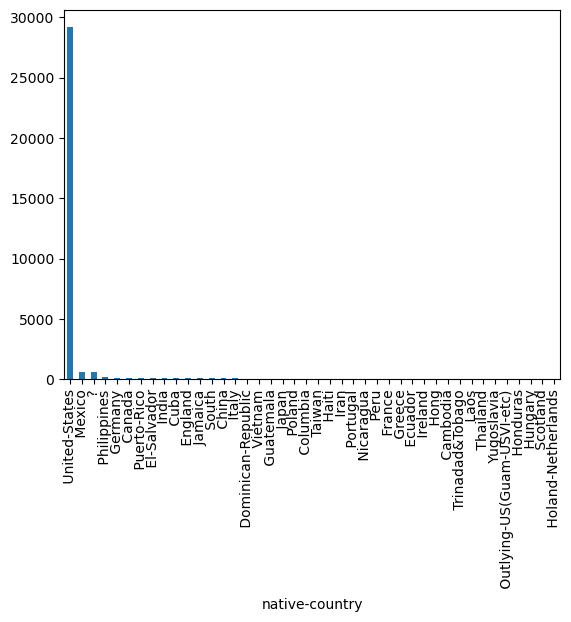

In [40]:
df['native-country'].value_counts().plot(kind='bar')

In [41]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [47]:
df['workclass']=df['workclass'].replace('?',np.nan)

In [48]:
df.dropna(inplace=True)

In [49]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [50]:
df['occupation']=df['occupation'].replace('?',np.nan)

In [54]:
df.dropna(inplace=True)

In [55]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [56]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14339
Never-married             9911
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.drop(columns=['fnlwgt'],inplace=True)

In [62]:
df.shape

(30693, 14)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30693 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30693 non-null  int64 
 1   workclass       30693 non-null  object
 2   education       30693 non-null  object
 3   education-num   30693 non-null  int64 
 4   marital-status  30693 non-null  object
 5   occupation      30693 non-null  object
 6   relationship    30693 non-null  object
 7   race            30693 non-null  object
 8   sex             30693 non-null  object
 9   capital-gain    30693 non-null  int64 
 10  capital-loss    30693 non-null  int64 
 11  hours-per-week  30693 non-null  int64 
 12  native-country  30693 non-null  object
 13  Income          30693 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [64]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [67]:
for i in df.select_dtypes(include='object').columns:
    if i != 'Income':
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])

In [ ]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})

In [69]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,4,9,13,2,3,0,4,1,0,0,13,39,0
1,38,2,11,9,0,5,1,4,1,0,0,40,39,0
2,53,2,1,7,2,5,0,2,1,0,0,40,39,0
3,28,2,9,13,2,9,5,2,0,0,0,40,5,0
4,37,2,12,14,2,3,5,4,0,0,0,40,39,0


In [71]:
X=df.drop('Income',axis=1)
y=df['Income']

In [72]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,4,9,13,2,3,0,4,1,0,0,13,39
1,38,2,11,9,0,5,1,4,1,0,0,40,39
2,53,2,1,7,2,5,0,2,1,0,0,40,39
3,28,2,9,13,2,9,5,2,0,0,0,40,5
4,37,2,12,14,2,3,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,7,12,2,12,5,4,0,0,0,38,39
32556,40,2,11,9,2,6,0,4,1,0,0,40,39
32557,58,2,11,9,6,0,4,4,0,0,0,40,39
32558,22,2,11,9,4,0,3,4,1,0,0,20,39


In [73]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30693, dtype: int64

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
print(X_train.shape,X_test.shape)

(24554, 13) (6139, 13)


In [78]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [79]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
y_pred1 = rf.predict(X_test)

In [81]:
y_pred1

array([0, 0, 1, ..., 0, 0, 0], shape=(6139,))

In [82]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Accuracy: 0.8506271379703535

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4621
           1       0.73      0.63      0.68      1518

    accuracy                           0.85      6139
   macro avg       0.81      0.78      0.79      6139
weighted avg       0.85      0.85      0.85      6139


Confusion Matrix:
[[4261  360]
 [ 557  961]]


In [88]:
scorer = make_scorer(recall_score, pos_label=1)

In [84]:
rf_model = RandomForestClassifier(random_state=42)

In [85]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}],
    'max_features': ['sqrt', 'log2']
}

In [90]:
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,  
    scoring=scorer,  # Optimize for recall of class 1
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

In [91]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_l

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced', {0: 1, 1: 2}, ...], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"make_scorer(r..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [92]:
print("\n" + "="*50)
print("BEST PARAMETERS:")
print(grid_search_rf.best_params_)
print("\nBest Cross-Validation Recall Score (Class 1):", grid_search_rf.best_score_)
print("="*50)


BEST PARAMETERS:
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

Best Cross-Validation Recall Score (Class 1): 0.8644371941272431


In [93]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [94]:
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8071347124938915

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.95      0.79      0.86      4621
        >50K       0.57      0.87      0.69      1518

    accuracy                           0.81      6139
   macro avg       0.76      0.83      0.78      6139
weighted avg       0.86      0.81      0.82      6139


Confusion Matrix:
[[3630  991]
 [ 193 1325]]


In [96]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [97]:
y_pred_ada = ada_model.predict(X_test)

In [99]:
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_ada):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, target_names=['<=50K', '>50K']))

print("\nConfusion Matrix:")
cm_ada = confusion_matrix(y_test, y_pred_ada)
print(cm_ada)



Accuracy: 0.8542

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4621
        >50K       0.76      0.60      0.67      1518

    accuracy                           0.85      6139
   macro avg       0.82      0.77      0.79      6139
weighted avg       0.85      0.85      0.85      6139


Confusion Matrix:
[[4331  290]
 [ 605  913]]


In [103]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

In [104]:
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [105]:
y_pred_xgb = xgb_model.predict(X_test)

In [106]:
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['<=50K', '>50K']))

print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)


Accuracy: 0.8742

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4621
        >50K       0.78      0.69      0.73      1518

    accuracy                           0.87      6139
   macro avg       0.84      0.81      0.82      6139
weighted avg       0.87      0.87      0.87      6139


Confusion Matrix:
[[4321  300]
 [ 472 1046]]


In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'scale_pos_weight': [2, 3, 4, 5], 
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

In [108]:
grid_xgb = GridSearchCV(
    xgb_model, 
    param_grid_xgb, 
    cv=5, 
    scoring=scorer,  # Optimize for Class 1 recall
    n_jobs=-1, 
    verbose=2
)

In [109]:
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2, subsample=0.8; total time=   0.2s

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.05, 0.1, ...], 'max_depth': [4, 6, ...], 'min_child_weight': [1, 3, ...], ...}"
,scoring,"make_scorer(r..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [110]:
print(grid_xgb.best_params_)
print(f"\nBest CV Recall Score: {grid_xgb.best_score_:.4f}")

best_xgb = grid_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 1.0}

Best CV Recall Score: 0.9261


In [111]:
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.97      0.72      0.83      4621
        >50K       0.52      0.93      0.67      1518

    accuracy                           0.77      6139
   macro avg       0.75      0.82      0.75      6139
weighted avg       0.86      0.77      0.79      6139



In [117]:
with open('best_donor_model_xgboost.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

In [118]:
print("Best hyperparameters found:")
print(grid_xgb.best_params_)

Best hyperparameters found:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 1.0}


In [119]:
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features for Finding Donors:")
print(feature_imp.head(10))


Top 10 Most Important Features for Finding Donors:
           feature  importance
4   marital-status    0.387513
3    education-num    0.111287
0              age    0.104831
9     capital-gain    0.076331
2        education    0.073346
6     relationship    0.065996
11  hours-per-week    0.049045
10    capital-loss    0.037333
5       occupation    0.035462
8              sex    0.029459
